# ***IMPORTING LIBRARIES***

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping

# ***Importing Dataset***

In [8]:
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# **Making A Copy Of Dataset**

In [9]:
copy_df = df.copy()
copy_df.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


# ***Info Regarding Each Features In Dataset***

In [10]:
#   LoanID	        --> A UNIQUE ID FOR EACH LOAN
#   Age	            --> AGE OF THE BORROWER
#   Income	        --> THE INCOME OF THE BORROWER IN ANNUAL
#   LoanAmount	    --> THE AMOUNT OF MONEY BE BORROWED
#   CreditScore	    --> THE CREDIT SCORE OF THE BORROWER THAT HE/SHE WORTH OF GIVEN LOAN OR NOT
#   MonthsEmployed	--> THE NO OF MONTHS THE BORROWER HAS BEEN EMPLOYED (how many months he/she works as employed)
#   NumCreditLines	--> HOW MANY LOAN AND CREDIT ACCOUNT A BORROWER HAS IN TOTAL (like credit cards, car loan, house loan, etc)
#   InterestRate	  --> THE INTEREST RATE OF THE LOAN
#   LoanTerm	      --> THE LENGTH OF THE LOAN IN MONTHS
#   DTIRatio	      --> HOW MUCH A PERSON MONTHLY INCOME GORES TO PAYING DEBTS (if the number is high --> more risky to give them a new loan)
#   Education	      --> THE HIGHER LEVEL OF EDUCATION OF THE BORROWER (PhD, Master, Diploma, etc)
#   EmploymentType	--> THE TYPE OF EMPLOYER STATUS OF THE BORROWER (full-time, part-time, unemployed, etc)
#   MaritalStatus	  --> THE MARITAL STATUS OF THE BORROWER (single, married, etc)
#   HasMortgage     --> DOES A PERSON ALREADY HAS A HOUSE LOAN (yes or no)
#   HasDependents	  --> DOES A BORROWER HAS DEPENDED (yes or no)
#   LoanPurpose	    --> THE PURPOSE OF THE LOAN (home, education, car, health, etc)
#   HasCoSigner	    --> THE LOAN HAS A CO-SIGNER (another person shares responsibility to pay if the main borrower can’t) --> (yes or no)
#   Default         --> INDICATE WHERTER TO GIVE LOAN OR NOT (0=yes or 1=no)

# ***BASIC EDA***

In [11]:
# Droping the LoanID feature
copy_df = copy_df.drop(columns="LoanID")
copy_df.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [12]:
# Check missing values in seach features
copy_df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


In [13]:
# Check for duplicated
copy_df.duplicated().sum()

np.int64(0)

In [14]:
# Check the shape of the datasets
copy_df.shape

(255347, 17)

In [15]:
# Check the basic info such as rows, cols, dtype, memory, missing values, etc
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [16]:
# Check the stats of the datasets on numeric cols
copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


# ***Visulization***

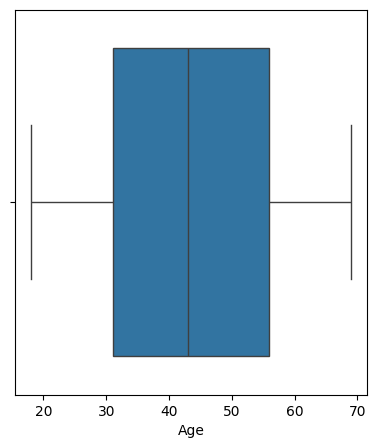

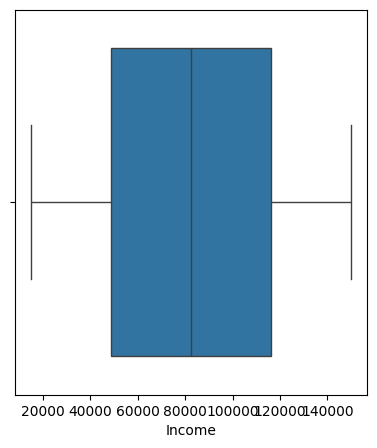

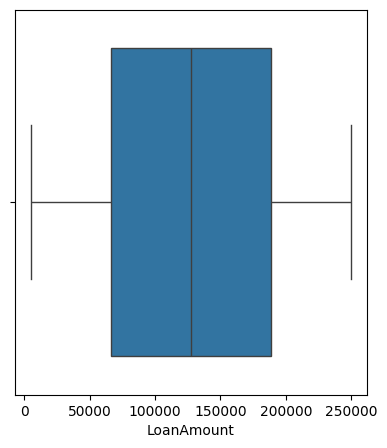

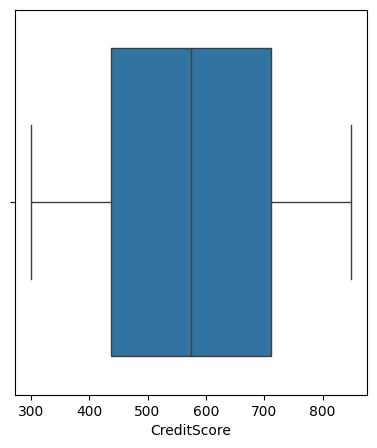

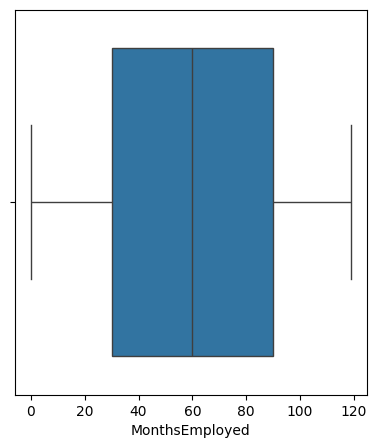

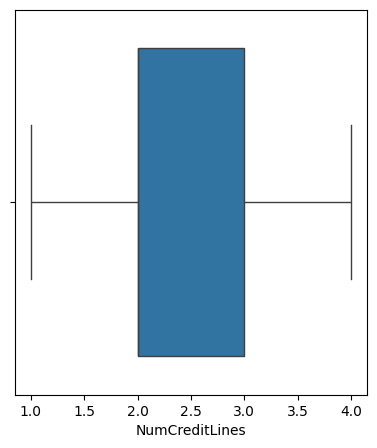

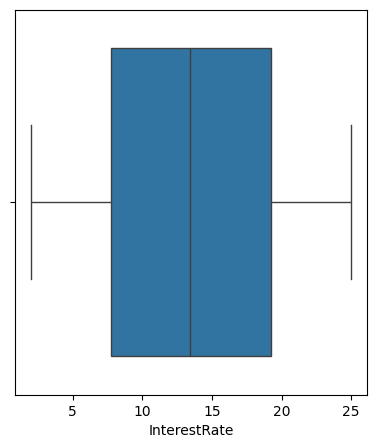

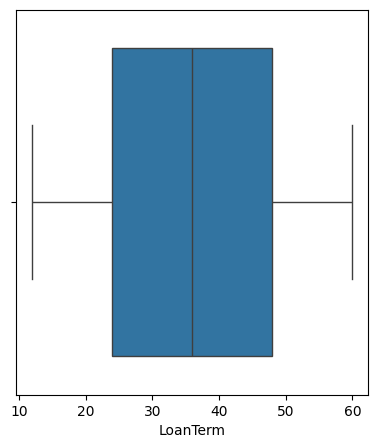

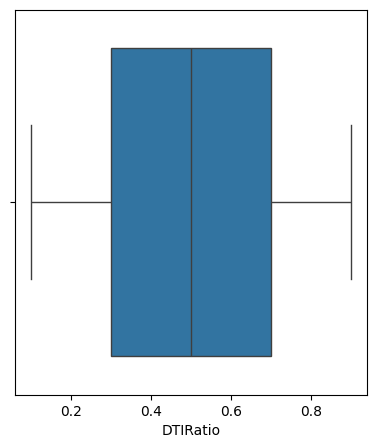

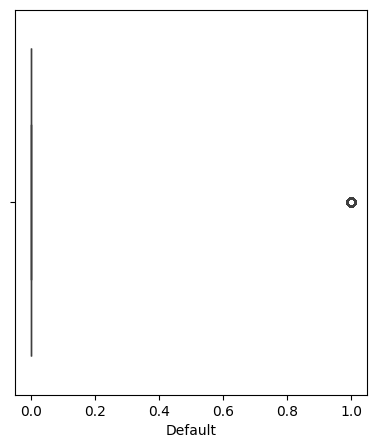

In [17]:
# Draw boxplot for all numeric features in dataset separatly side by side
num_cols = copy_df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=copy_df[col])

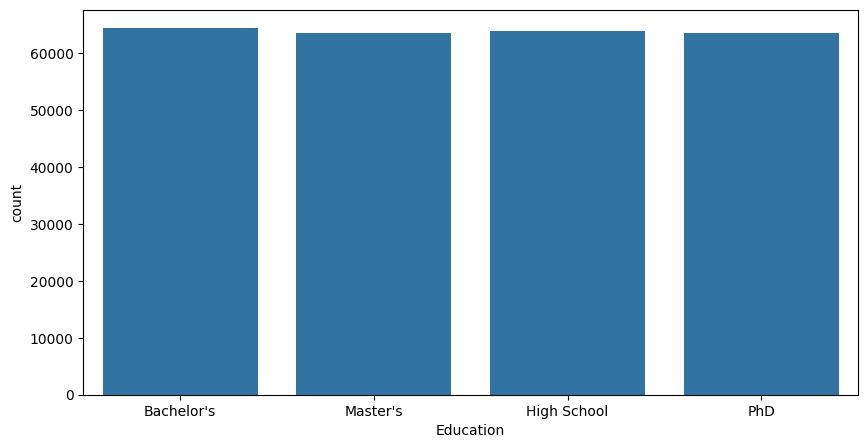

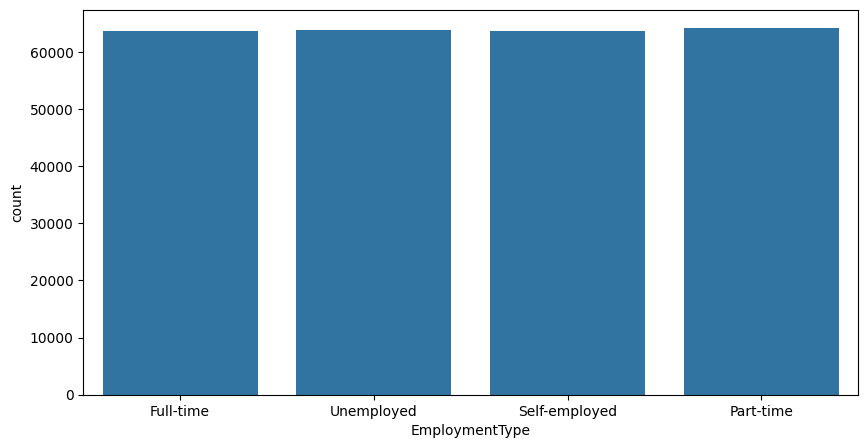

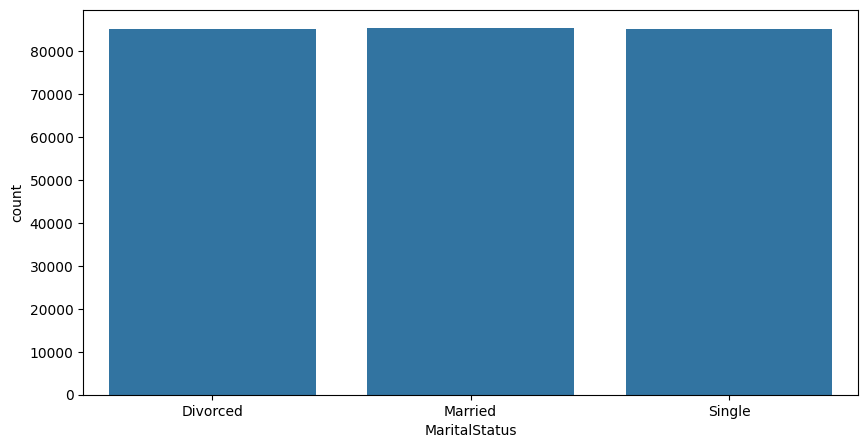

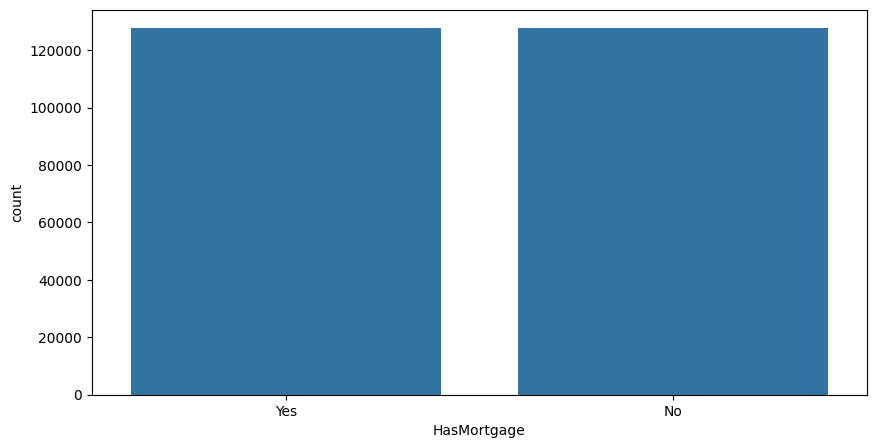

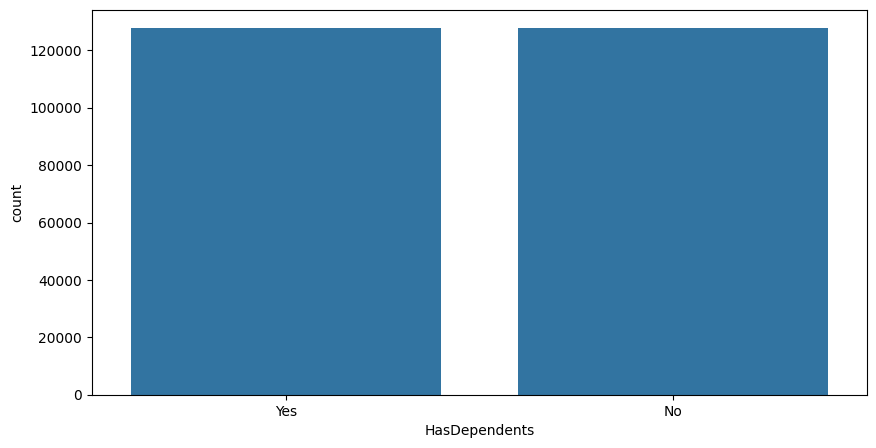

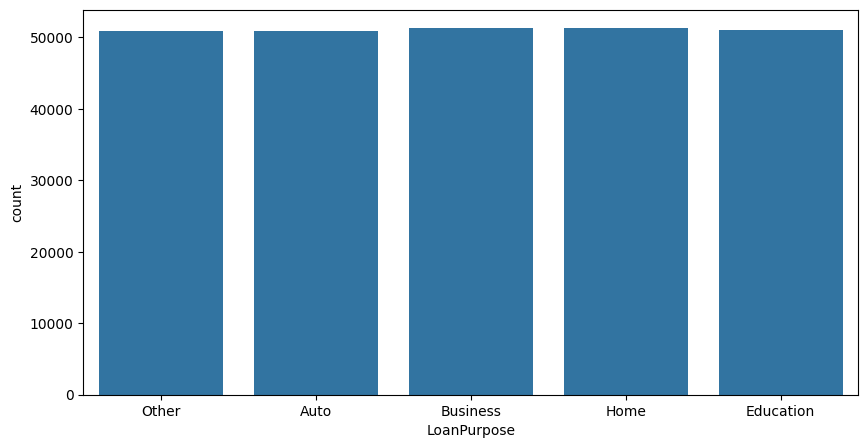

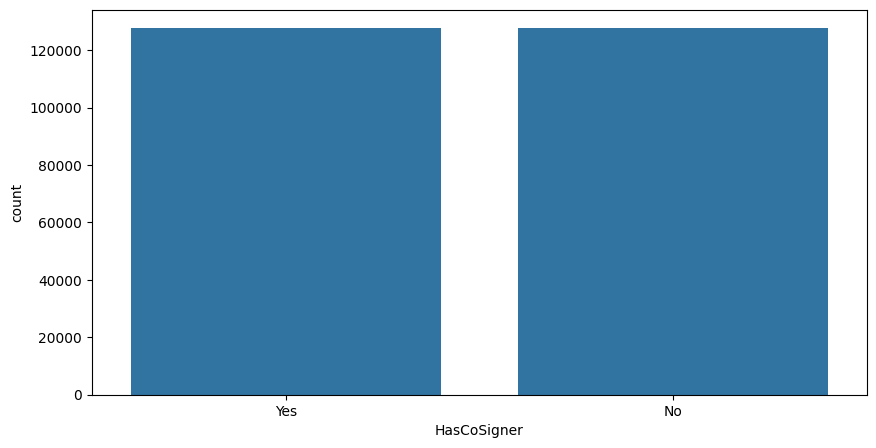

In [18]:
# Draw couterplot for each cat cols in dataset
cat_cols = copy_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=copy_df[col])

# ***Preprocessing***

### **ENCODING**

In [19]:
encd_df = copy_df.copy()

# Define target column
target = "Default"
# Separate categorical & numerical features
categorical_cols = encd_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = encd_df.select_dtypes(include=[np.number]).columns.tolist()
if target in numerical_cols:
    numerical_cols.remove(target)


# --- Ordinal Encoding ---
# Education: Define order
education_order = [[ 'High School',"Bachelor's", "Master's", 'PhD']]
encd_df['Education'] = OrdinalEncoder(categories=education_order).fit_transform(encd_df[['Education']])


# --- One-Hot Encoding ---
ohe_cols = ['EmploymentType', 'MaritalStatus', 'LoanPurpose']
encd_df = pd.get_dummies(encd_df, columns=ohe_cols, drop_first=True)


# --- Binary Encoding ---
encd_df['HasMortgage'] = encd_df['HasMortgage'].map({'Yes': 1, 'No': 0})
encd_df['HasCoSigner'] = encd_df['HasCoSigner'].map({'Yes': 1, 'No': 0})
encd_df['HasDependents'] = encd_df['HasDependents'].map({'Yes': 1, 'No': 0})

encd_df = encd_df.astype({col: int for col in encd_df.select_dtypes(bool).columns})
encd_df = encd_df.astype({col: int for col in encd_df.select_dtypes(object).columns})

encd_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,...,1,0,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,...,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,...,0,0,0,1,0,0,0,0,0,0


### **Balancing Dataset**

In [20]:
from imblearn.over_sampling import SMOTE
X = encd_df.drop("Default", axis=1)
y = encd_df["Default"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# AGAIN convert into single df
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
resampled_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,...,0,0,0,0,0,0,0,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,...,0,0,0,1,0,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,...,0,0,1,0,0,0,0,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,...,0,0,0,1,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
resampled_df["Default"].value_counts()

,count
Default,
0,225694
1,225694


### **Scaling**

In [22]:
cols = ["Age","Income","LoanAmount","CreditScore","MonthsEmployed","NumCreditLines","InterestRate","LoanTerm","DTIRatio"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
resampled_df[cols] = scaler.fit_transform(resampled_df[cols])
resampled_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,2.0,...,0,0,0,1,0,0,0,0,1,0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,2.0,...,0,0,1,0,0,0,0,0,0,1
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.0,...,0,0,0,1,0,1,0,0,0,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,1.0,...,0,0,1,0,0,0,0,0,0,0


# ***Data spliting***

In [23]:
X = resampled_df.drop("Default", axis=1)
y = resampled_df["Default"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **MODEL ARCH BUILDING**

### Base model --> 0.90

In [24]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=22))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8540 - loss: 0.3472 - val_accuracy: 0.8715 - val_loss: 0.3103
Epoch 2/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8742 - loss: 0.3051 - val_accuracy: 0.8802 - val_loss: 0.2964
Epoch 3/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8795 - loss: 0.2946 - val_accuracy: 0.8779 - val_loss: 0.2981
Epoch 4/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8824 - loss: 0.2874 - val_accuracy: 0.8808 - val_loss: 0.2909
Epoch 5/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8814 - loss: 0.2878 - val_accuracy: 0.8830 - val_loss: 0.2876
Epoch 6/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8839 - loss: 0.2843 - val_accuracy: 0.8838 - val_loss: 0.2856
Epoch 7/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8854 - loss: 0.2822 - val_accuracy: 0.8857 - val_loss: 0.2831
Epoch 8/20
5778/5778 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8865 - loss: 0

In [28]:
# accuracy: 0.9028 - loss: 0.2410 - val_accuracy: 0.8995 - val_loss: 0.2506

# ***Keras Tuner In DL***

In [29]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [30]:
import keras_tuner as kt

In [31]:
from tensorflow.keras import regularizers

def build_model(hp):
    model = Sequential()

    # Loop through number of layers (1 to 10)
    for i in range(hp.Int("num_layers", min_value=1, max_value=10)):

        # Units + activation
        units = hp.Int(f"units_{i}", min_value=16, max_value=256, step=16)
        activation = hp.Choice(f"activation_{i}", values=["relu", "tanh", "sigmoid"])

        if i == 0:
            model.add(Dense(
                units=units,
                activation=activation,
                input_dim=22,
                kernel_regularizer=regularizers.l2(hp.Float("l2_reg", 1e-5, 1e-2, sampling="log"))
            ))
        else:
            model.add(Dense(
                units=units,
                activation=activation,
                kernel_regularizer=regularizers.l2(hp.Float("l2_reg", 1e-5, 1e-2, sampling="log"))
            ))

        # Batch Normalization (optional, but often helps)
        if hp.Boolean(f"batch_norm_{i}"):
            model.add(BatchNormalization())

        # Dropout layer
        model.add(Dropout(hp.Float(f"dropout_{i}", min_value=0.0, max_value=0.6, step=0.1)))

    # Output layer (binary classification)
    model.add(Dense(1, activation="sigmoid"))

    # Optimizer choice + learning rate
    optimizer = hp.Choice("optimizer", ["adam", "nadam", "rmsprop", "sgd"])
    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")

    if optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "nadam":
        opt = tf.keras.optimizers.Nadam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

    # Compile
    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [32]:
tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=3, directory="mydir", project_name="all_in_one_1")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 03m 23s]
val_accuracy: 0.8576840162277222

Best val_accuracy So Far: 0.8771461248397827
Total elapsed time: 00h 10m 39s


In [35]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units_0': 176,
 'activation_0': 'relu',
 'l2_reg': 0.0006942074595017898,
 'batch_norm_0': False,
 'dropout_0': 0.1,
 'optimizer': 'rmsprop',
 'learning_rate': 0.0001964530109548961,
 'units_1': 16,
 'activation_1': 'relu',
 'batch_norm_1': False,
 'dropout_1': 0.0,
 'units_2': 16,
 'activation_2': 'relu',
 'batch_norm_2': False,
 'dropout_2': 0.0,
 'units_3': 16,
 'activation_3': 'relu',
 'batch_norm_3': False,
 'dropout_3': 0.0,
 'units_4': 16,
 'activation_4': 'relu',
 'batch_norm_4': False,
 'dropout_4': 0.0,
 'units_5': 16,
 'activation_5': 'relu',
 'batch_norm_5': False,
 'dropout_5': 0.0}

In [36]:
model = tuner.get_best_models(num_models=1)[0]

In [37]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8760 - loss: 0.3223 - val_accuracy: 0.8619 - val_loss: 0.3516
Epoch 2/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.8756 - loss: 0.3227 - val_accuracy: 0.8768 - val_loss: 0.3175
Epoch 3/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8763 - loss: 0.3206 - val_accuracy: 0.8756 - val_loss: 0.3205
Epoch 4/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8759 - loss: 0.3196 - val_accuracy: 0.8776 - val_loss: 0.3144
Epoch 5/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.8765 - loss: 0.3186 - val_accuracy: 0.8768 - val_loss: 0.3169
Epoch 6/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8771 - loss: 0.3181 - val_accuracy: 0.8764 - val_loss: 0.3156
Epoch 7/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8763 - loss: 0.3176 - val_accuracy: 0.8785 - val_loss: 0.3123
Epoch 8/20
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 

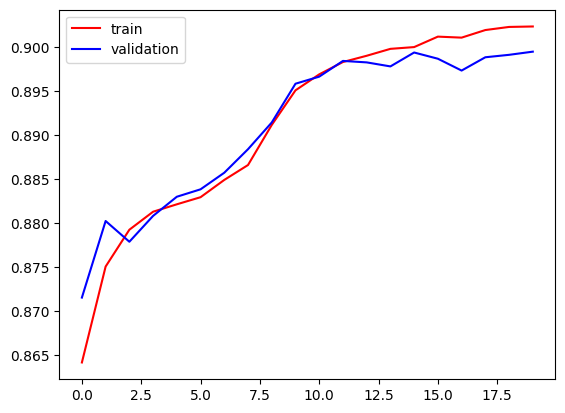

In [38]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# ***MODEL SAVING***

In [41]:
joblib.dump(model, "final_model.pkl")

['final_model.pkl']

# ***ML --> 0.82 TO DL --> 0.87***

# ***Pipeline***

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
import joblib

# -----------------------------
# Column groups
# -----------------------------
ordinal_cols = ["Education"]   # Custom order
label_cols = ["HasMortgage", "HasCoSigner", "HasDependents"]
num_cols = ["Age","Income","LoanAmount","CreditScore","MonthsEmployed",
            "NumCreditLines","InterestRate","LoanTerm","DTIRatio"]
onehot_cols = ["EmploymentType", "MaritalStatus", "LoanPurpose"]

# -----------------------------
# Pipelines
# -----------------------------

label_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("label", OrdinalEncoder(categories=[["No", "Yes"]] * len(label_cols)))
])

# Ordinal Encoding (Education order)
education_order = [["High School", "Bachelor's", "Master's", "PhD"]]
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=education_order))
])

# Numerical pipeline (median fill + scaling)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

# One-hot pipeline
onehot_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore",drop="first"))
])

# -----------------------------
# Combine everything
# -----------------------------
preprocessor = ColumnTransformer([
    ("label", label_pipeline, label_cols),
    ("ordinal", ordinal_pipeline, ordinal_cols),
    ("num", num_pipeline, num_cols),
    ("onehot", onehot_pipeline, onehot_cols)
])

# -----------------------------
# Example usage
# -----------------------------
df_copy = df.copy()
X = df_copy.drop(columns=["Default","LoanID"], axis=1)
y = df_copy["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('label',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('label',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]))]),
                                 ['HasMortgage', 'HasCoSigner',
                                  'HasDependents']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(categorie...
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Income', 'LoanAmount', 'CreditScore',
                                  'MonthsEmployed', 'NumCreditLines',
                                  'InterestRate', 'LoanTerm', 'DTIRatio']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['EmploymentType', 'MaritalStatus',
                                  'LoanPurpose'])])

# ***SAVING PIPELINE***

In [40]:
# Save pipeline
joblib.dump(preprocessor, "preprocessor_pipeline.pkl")
print("✅ Preprocessor pipeline saved as preprocessor_pipeline.pkl")

✅ Preprocessor pipeline saved as preprocessor_pipeline.pkl


# ***PREDICTION***

** >= 0.5 --> 0 A**

In [42]:
import pandas as pd
import joblib
import numpy as np

# Load model and pipeline
model = joblib.load("final_model.pkl")
pipeline = joblib.load("preprocessor_pipeline.pkl")

for i in range(100):
  print(i)
  raw_input = X_test.iloc[i]
  # Convert to DataFrame
  raw_df = pd.DataFrame([raw_input])

  # Preprocess input
  processed_input = pipeline.transform(raw_df)


  prob = model.predict(processed_input)[0][0]

  # Thresholding
  prediction = 1 if prob >= 0.5 else 0

  if prediction == 0:
      print(f"Probability={prob:.2f} → ✅ Loan Approved")
  else:
      print(f"Probability={prob:.2f} → ❌ Loan Not Approved")


0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Probability=0.02 → ✅ Loan Approved
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probability=0.06 → ✅ Loan Approved
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probability=0.02 → ✅ Loan Approved
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Probability=0.08 → ✅ Loan Approved
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability=0.02 → ✅ Loan Approved
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probability=0.03 → ✅ Loan Approved
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probability=0.06 → ✅ Loan Approved
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probability=0.49 → ✅ Loan Approved
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Probability=0.14 → ✅ Loan Approved
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Probability=0.05 → ✅ Loan Approved
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probability=0.03 → ✅ Loan Approved
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probability=0.13 → ✅ Loan Approved
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Probability=0.09 → ✅ Loan Approved
13
1/1 ━━━━━━━━━━━━━━